# Assignment 09 Solutions

#### 1. What are the advantages of a CNN for image classification over a completely linked DNN?

When a CNN has learned a kernel that can detect a particular feature, it can detect that feature anywhere on the image. In contrast, when a DNN learns a feature in one location, it can detect it only in that particular location.

#### 2. Consider a CNN with three convolutional layers, each of which has three kernels, a stride of two, and SAME padding. The bottom layer generates 100 function maps, the middle layer 200, and the top layer 400. RGB images with a size of 200 x 300 pixels are used as input. How many criteria does the CNN have in total? How much RAM would this network need when making a single instance prediction if we re using 32-bit floats? What if you were to practice on a batch of 50 images?

- Bottom layer = 1200, middle layer = 60200 ,Top layer = 240400 
- Total layer = 301800
- Input image: 200 × 300 × 3 200×300×3 channels (RGB) × 4bytes per float =720000 bytes
- Bottom layer output: 6,000,000bytes
- Middle layer output: 3,000,000bytes
- Top layer output: 3,800,000bytes
- Instance prediction = 13,520,000 bytes or 12.9 MB of RAM.
- If you were to process a batch of 50 images, you would need to multiply this by the batch size: 13,520,000×50=676,000,000bytes
- So, for a batch of 50 images, the network would require approximately 676 MB of RAM.

#### 3. What are five things you might do to fix the problem if your GPU runs out of memory while training a CNN?

Reduce Batch Size, Data Augmentation, Simplify the Model, Memory Efficient Frameworks ,Gradient Checkpointing:

#### 4. Why would you use a max pooling layer instead with a convolutional layer of the same stride?

While using a convolutional layer with the same stride achieves a degree of spatial downsampling, max pooling complements this process by adding translation invariance, feature invariance, and a reduction in computational complexity. It's common to see both convolutional layers and max pooling layers used together in convolutional neural networks (CNNs) to capture hierarchical features and reduce spatial dimensions effectively.

#### 5. When would a local response normalization layer be useful?

LRN layers can have benefits in certain scenarios, they are not as widely used today, and alternative normalization techniques like BN or GN are generally preferred for improved stability and convergence during training.

#### 6. In comparison to LeNet-5, what are the main innovations in AlexNet? What about GoogLeNet and ResNet's core innovations?

These innovations in AlexNet, GoogLeNet, and ResNet have played crucial roles in advancing the field of deep learning, leading to improvements in accuracy, training stability, and the ability to train very deep neural networks.

#### 7. On MNIST, build your own CNN and strive to achieve the best possible accuracy.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


11490434/11490434 [==============================] - 3s 0us/step
Epoch 1/10
750/750 [==============================] - 12s 15ms/step - loss: 0.2097 - accuracy: 0.9373 - val_loss: 0.0650 - val_accuracy: 0.9814
Epoch 2/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0585 - accuracy: 0.9818 - val_loss: 0.0614 - val_accuracy: 0.9819
Epoch 3/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.0481 - val_accuracy: 0.9854
Epoch 4/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.0440 - val_accuracy: 0.9868
Epoch 5/10
750/750 [==============================] - 12s 15ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0458 - val_accuracy: 0.9879
Epoch 6/10
750/750 [==============================] - 12s 15ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0443 - val_accuracy: 0.9874
Epoch 7/10
750/750 [==============================] - 12s 16ms/step - l

#### 8. Using Inception v3 to classify broad images. a. Images of different animals can be downloaded. Load them in Python using the matplotlib.image.mpimg.imread() or scipy.misc.imread() functions, for example. Resize and/or crop them to 299 x 299 pixels, and make sure they only have three channels (RGB) and no transparency. The photos used to train the Inception model were preprocessed to have values ranging from -1.0 to 1.0, so make sure yours do as well.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


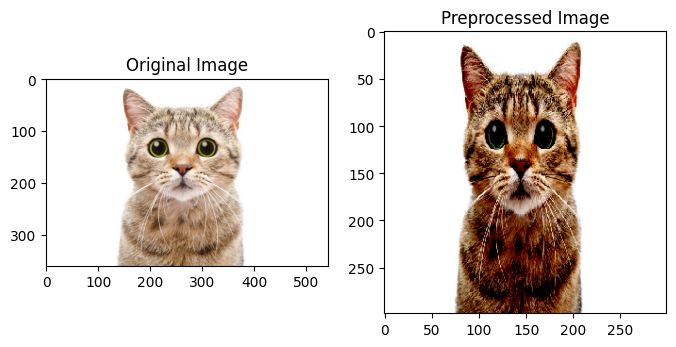

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image

# Load and preprocess image function
def load_and_preprocess_image(img_path):
    # Load image using Keras image module
    img = image.load_img(img_path, target_size=(299, 299))
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Expand the dimensions to match the input shape for InceptionV3
    img_array = np.expand_dims(img_array, axis=0)
    
    # Preprocess the image for the InceptionV3 model
    img_array = preprocess_input(img_array)
    
    return img_array

# Example usage
img_path = "cat.jpg"
img_array = load_and_preprocess_image(img_path)

# Display the original and preprocessed images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(plt.imread(img_path))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img_array[0])
plt.title('Preprocessed Image')

plt.show()


#### 9. Large-scale image recognition using transfer learning.
##### a. Make a training set of at least 100 images for each class. You might, for example, identify your own photos based on their position (beach, mountain, area, etc.) or use an existing dataset, such as the flowers dataset or MIT&#39;s places dataset (requires registration, and it is huge).
##### b. Create a preprocessing phase that resizes and crops the image to 299 x 299 pixels while also adding some randomness for data augmentation.
##### c. Using the previously trained Inception v3 model, freeze all layers up to the bottleneck layer (the last layer before output layer) and replace output layer with appropriate number of outputs for your new classification task (e.g., the flowers dataset has five mutually exclusive classes so the output layer must have five neurons and use softmax activation function).
##### d. Separate the data into two sets: a training and a test set. The training set is used to train the model, and the test set is used to evaluate it.

In [5]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

# Set the random seed for reproducibility
tf.random.set_seed(42)

# Set the path to your dataset
dataset_dir = 'dataset'

# Image size and channels
img_size = (299, 299)
channels = 3

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and augment the training set
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

# Split the data into training and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    train_generator.filenames,
    train_generator.labels,
    test_size=0.2,
    random_state=42,
    stratify=train_generator.labels
)

# Load the test set without augmentation
test_generator = test_datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep filenames and labels in the same order
)


Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [6]:
# Create a new model with a custom output layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(3, activation='softmax'))  # Adjust the number of neurons based on your classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs as needed
)

Epoch 1/10
10/10 [==============================] - 12s 886ms/step - loss: 0.8593 - accuracy: 0.6667
Epoch 2/10
10/10 [==============================] - 9s 872ms/step - loss: 0.4428 - accuracy: 0.9000
Epoch 3/10
10/10 [==============================] - 9s 878ms/step - loss: 0.2447 - accuracy: 0.9767
Epoch 4/10
10/10 [==============================] - 9s 869ms/step - loss: 0.1868 - accuracy: 0.9633
Epoch 5/10
10/10 [==============================] - 9s 872ms/step - loss: 0.1545 - accuracy: 0.9700
Epoch 6/10
10/10 [==============================] - 9s 877ms/step - loss: 0.1356 - accuracy: 0.9733
Epoch 7/10
10/10 [==============================] - 9s 877ms/step - loss: 0.1148 - accuracy: 0.9800
Epoch 8/10
10/10 [==============================] - 9s 907ms/step - loss: 0.1061 - accuracy: 0.9833
Epoch 9/10
10/10 [==============================] - 9s 882ms/step - loss: 0.0995 - accuracy: 0.9767
Epoch 10/10
10/10 [==============================] - 9s 874ms/step - loss: 0.0895 - accuracy: 0.983

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

10/10 [==============================] - 8s 710ms/step - loss: 0.0721 - accuracy: 0.9833
Test Accuracy: 98.33%
